# Will it rain tomorrow in Australia? (Binary Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
weather = pd.read_csv("weatherAUS.csv")
weather.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


**Column Info**
- Date: date
- Location: Location in Australia
- MinTemp, MaxTemp: minimum and maximumm temperature of the day
- Rainfall: how much it rained
- RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
- RainTomorrow(Target): 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
rain = weather.RainTomorrow.value_counts()['Yes']
print(rain)

31877


## Data Preprocessing

In [5]:
# 머신러닝 알고리즘에 불필요한 속성 제거, 인덱스 재설정
def drop_features(df):
    df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Evaporation', 'Sunshine'],axis=1,inplace=True)
    df = df.set_index(['Date'])
    return df

# Null 처리 함수 - 데이터 갯수가 많으므로 null row 다 드랍
def fillna(df):
    df = df.dropna()
    return df

# 레이블 인코딩 수행 - RainToday, RainTomorrow 칼럼
def format_features(df):
    df['RainToday'] = df['RainToday'].replace(['Yes','No'],[1,0])
    df['RainTomorrow'] = df['RainTomorrow'].replace(['Yes','No'],[1,0])
    return df

# 실제로 비가 내린 날짜 카운트
def count_rain(df):
    rain = df.RainTomorrow.value_counts()[1]
    print(rain)
    
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = fillna(df)
    count_rain(df)
    df = format_features(df)
    return df

In [10]:
# 원본 데이터를 재로딩하고, 시각화해보기
weather_df = pd.read_csv("weatherAUS.csv")
visual_df = transform_features(weather_df)

17242


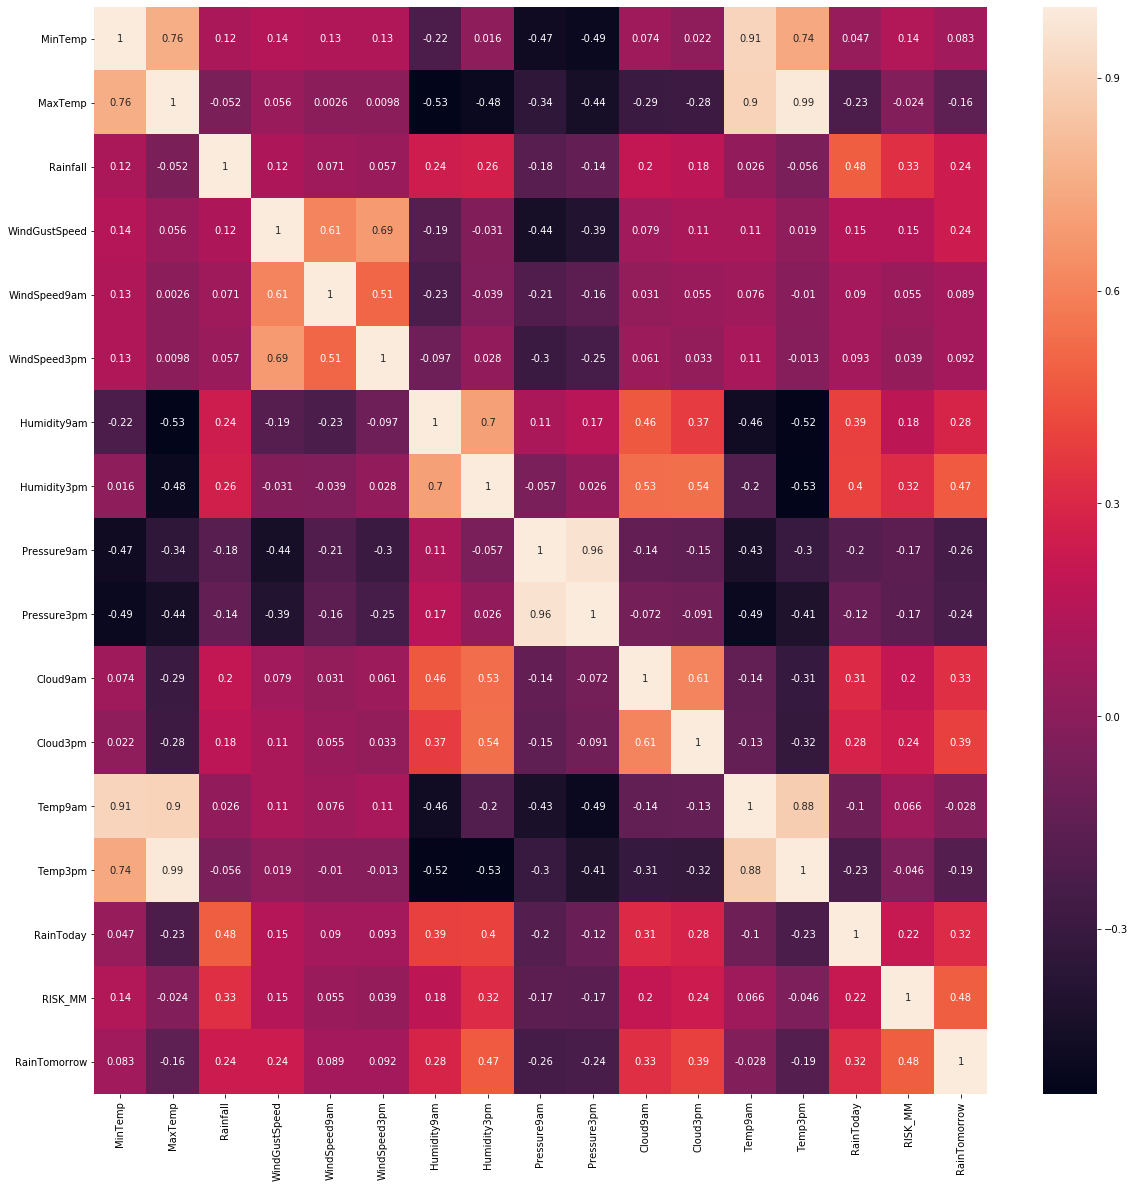

In [11]:
import seaborn as sns
fig=plt.figure(figsize=(20,20))
sns.heatmap(visual_df.corr(),annot=True)

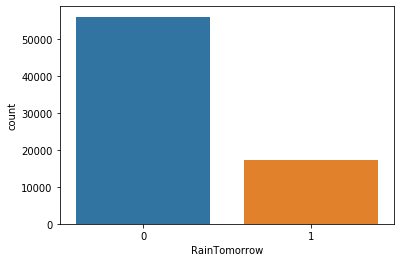

In [13]:
sns.countplot(visual_df['RainTomorrow'])

In [14]:
# 원본 데이터를 재로딩 하고, Label 데이터 셋 추출. 
weather_df = pd.read_csv("weatherAUS.csv")
y_weather_df = transform_features(weather_df)
y_weather_df = y_weather_df['RainTomorrow']

17242


In [15]:
# 원본 데이터를 재로딩 하고, feature 데이터 셋 추출. 
weather_df = pd.read_csv("weatherAUS.csv")
X_weather_df = transform_features(weather_df)
X_weather_df= X_weather_df.drop('RainTomorrow',axis=1)

17242


In [16]:
# test 셋과 training set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_weather_df, y_weather_df, test_size=0.4, random_state=80)

In [18]:
#standardscaler로 평균이 0 표준편차가 1으로 만들어준다
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
X_test

array([[-1.16009285, -1.58141996, -0.04833989, ..., -1.64256785,
         1.77662737, -0.12766433],
       [-0.28616133, -0.11937612, -0.27815935, ...,  0.04749133,
        -0.56286423, -0.24760716],
       [ 0.23513115,  0.11733574, -0.27815935, ..., -0.08032827,
        -0.56286423,  0.25215463],
       ...,
       [ 1.79900861,  1.39836463, -0.27815935, ...,  1.58132655,
        -0.56286423, -0.26759763],
       [-0.30149346, -1.31685965, -0.27815935, ..., -1.17389598,
        -0.56286423, -0.26759763],
       [ 0.67976298,  0.54898678, -0.27815935, ...,  0.5161632 ,
        -0.56286423, -0.26759763]])

In [28]:
# X_train = X_weather_df[6659:22024]
# X_test = X_weather_df[0:6658]
# y_train = y_weather_df[6659:22024]
# y_test = y_weather_df[0:6658]

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
print(pred)
print("예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

[1 0 1 ... 0 0 0]
예측 정확도:0.9999


In [30]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_weather_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_weather_df.values[train_index], X_weather_df.values[test_index]
        y_train, y_test = y_weather_df.values[train_index], y_weather_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 1.0000
교차 검증 4 정확도: 1.0000
평균 정확도: 1.0000


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_weather_df , y_weather_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 1.0000
교차 검증 4 정확도: 1.0000
평균 정확도: 1.0000


## 정확도가 이상하다 ㅠㅠ
구글링을 해본 결과 몇가지 가능성이 있는데
1. test set과 training set의 범위가 겹쳤다
    - sklearn.model_selection으로도 해보고 직접 수기로 인덱싱도 해서 나눠보았는데 test, training data가 겹치지는 않았다..
2. 데이터 사이즈가 너무 작아 test set의 결과가 운 좋게도(?) 다 일치했다
    - 데이터가 7만건인데 작은 사이즈라고 생각하지 않는다..!
3. 사소한 레퍼런스 실수
    - 이게 제일 가능성이 높아 보여서 몇번이고 검토했는데 뭐가 문제인지 모르겠다.. 

스터디 시간에 말해보기 ㅠㅠ 

## --> 문제점 발견!!